# **Open Data Examples** | Recreation facilities and neighborhood access
This notebook will walk you through the following:
* Downloading the City's recreation facility data from Open Data. These are rec centers, playground equipment, etc.
* Downloading the City's census population data
* "Buffering" from these locations, which means to search a certain distance from points on a map
* Summarize population information in those nearby areas

To run this notebook, you will need to install the following packages using `pip`:
1. `arcgis`
2. `cle-data-toolkit`

In [2]:
from arcgis import GIS
import geopandas as gpd

In [3]:
# Look for Cleveland's Parks & Recreation System data provided by the City's Office of Capital Projects

# Establish a connection with ArcGIS Online
gis = GIS()

In [4]:
# Look for the exact title of item. Select the first and only result, the Cleveland Parks service
parks_service = gis.content.search("title:Cleveland Parks and Recreation System")[0]
parks_service

<Item title:"Cleveland Parks and Recreation System" type:Feature Layer Collection owner:jrauschenbach_ago>

In [39]:
# Feature services are like servers that broadcast one or more datasets.
# Let's see what information is available in the layers
for idx, lyr in enumerate(parks_service.layers):
    print(idx, lyr.properties['name'])

0 Cleveland Recreation Centers
1 Outdoor Amenities
2 Park Space Amenities
3 Park Spaces


In [13]:
rec_centers_layer = parks_service.layers[0]
rec_centers_featureset = rec_centers_layer.query()
rec_centers_geojson = rec_centers_featureset.to_geojson

In [44]:
amenities_layer = parks_service.layers[2]
amenities_featureset = amenities_layer.query()
amenities_geojson = amenities_featureset.to_geojson

In [45]:
rec_centers_gdf = gpd.read_file(rec_centers_geojson, driver="GeoJSON", crs="EPSG:3734").set_crs(epsg=3734, allow_override=True)
amenities_gdf = gpd.read_file(amenities_geojson, driver="GeoJSON", crs="EPSG:3734").set_crs(epsg=3734, allow_override=True)

We now have the locations of various park amenities in the City. Let's see what percent of the population is within half a mile of all of these amenities.

We will need population figures from the Census Bureau. We will use a version of Census Bureau's Demographic and Housing Characteristics dataset posted by Esri. This is a more detailed age breakdown of Decennial Census results from 2020.

In [48]:
census_ago_id = 'ebeb65deb5c14f4d8849fd68944b7ee6'
census_item = gis.content.get(census_ago_id)

In [51]:
# Lets see what layers this service offers
for idx, lyr in enumerate(census_item.layers):
    print(idx, lyr.properties['name'])

0 Nation
1 State
2 County
3 Census Tract
4 Block Group


In [52]:
blockgroup_census = census_item.layers[4]
# Let's query blocks from the County
blockgroup_fs = blockgroup_census.query(where="County = 'Cuyahoga County'")
blockgroup_gjson = blockgroup_fs.to_geojson


<Axes: >

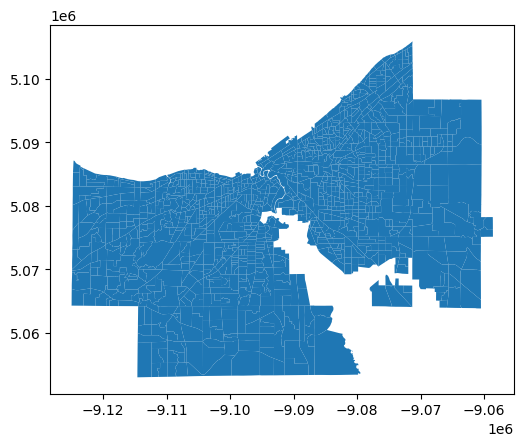

In [56]:
census_gdf = gpd.read_file(blockgroup_gjson, driver="GeoJSON", crs="EPSG:3857").set_crs(epsg=3857, allow_override=True)
census_gdf.plot()

In [59]:
census_gdf.overlay()

TypeError: Index(...) must be called with a collection of some kind, 'dfs' was passed